# Lets do it with a project :

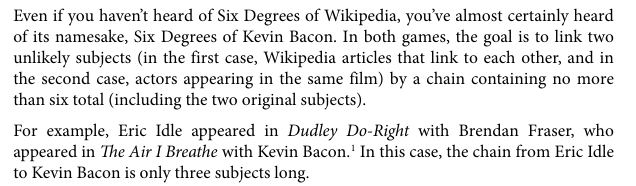

- `TASK ` : You’ll be able to take the Eric Idle page and find the fewest number of link clicks that will take you to the Kevin Bacon page.


In [2]:
from urllib.request import urlopen
from urllib.request import HTTPError
from urllib.request import URLError

from bs4 import BeautifulSoup

In [1]:
def parse_url(url):
    try:
        doc = urlopen(url)
        return BeautifulSoup(doc, "html.parser")
    except HTTPError as e:
        print(f"HTTP Error Occured. \n Code: {e.code} \n Reason : {e.reason}")
    except URLError as e:
        print(f"HTTP Error Occured. \n Reason : {e.reason}")
    except Exception as e:
        print(f"Something Else Happened : {e}")

In [4]:
url = "http://en.wikipedia.org/wiki/Kevin_Bacon"

kevin_bacon_site = parse_url(url)

print(kevin_bacon_site.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Kevin Bacon - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled 

In [6]:
#  to extract all links

for link in kevin_bacon_site.find_all("a"):
    print(link.attrs)

{'class': ['mw-jump-link'], 'href': '#bodyContent'}
{'href': '/wiki/Main_Page', 'title': 'Visit the main page [z]', 'accesskey': ['z']}
{'href': '/wiki/Wikipedia:Contents', 'title': 'Guides to browsing Wikipedia'}
{'href': '/wiki/Portal:Current_events', 'title': 'Articles related to current events'}
{'href': '/wiki/Special:Random', 'title': 'Visit a randomly selected article [x]', 'accesskey': ['x']}
{'href': '/wiki/Wikipedia:About', 'title': 'Learn about Wikipedia and how it works'}
{'href': '//en.wikipedia.org/wiki/Wikipedia:Contact_us', 'title': 'How to contact Wikipedia'}
{'href': 'https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_en.wikipedia.org&uselang=en', 'title': 'Support us by donating to the Wikimedia Foundation'}
{'href': '/wiki/Help:Contents', 'title': 'Guidance on how to use and edit Wikipedia'}
{'href': '/wiki/Help:Introduction', 'title': 'Learn how to edit Wikipedia'}
{'href': '/wiki/Wikipedia:Community

In [9]:
# there are some useless links and we have to complete the task in minimum clicks so lets check how to discard or optimize the search area:

# we found some similarities :
# • They reside within the div with the id set to bodyContent.
# • The URLs do not contain colons.
# • The URLs begin with /wiki/.

# regex : ^(/wiki/)((?!:).)*$"):
import re

for links in kevin_bacon_site.find("div", {"id": "bodyContent"}).find_all(
    "a", {"href": re.compile("^(/wiki/)((?!:).)*$")}
):
    if "href" in links.attrs:
        print(links["href"])

/wiki/Kevin_Bacon_(disambiguation)
/wiki/Philadelphia
/wiki/Kevin_Bacon_filmography
/wiki/Kyra_Sedgwick
/wiki/Sosie_Bacon
/wiki/Edmund_Bacon_(architect)
/wiki/Michael_Bacon_(musician)
/wiki/Leading_man
/wiki/Character_actor
/wiki/Golden_Globe_Award
/wiki/Screen_Actors_Guild_Award
/wiki/Primetime_Emmy_Award
/wiki/National_Lampoon%27s_Animal_House
/wiki/Footloose_(1984_film)
/wiki/Diner_(1982_film)
/wiki/JFK_(film)
/wiki/A_Few_Good_Men
/wiki/Apollo_13_(film)
/wiki/Mystic_River_(film)
/wiki/Frost/Nixon_(film)
/wiki/Friday_the_13th_(1980_film)
/wiki/Tremors_(1990_film)
/wiki/The_River_Wild
/wiki/The_Woodsman_(2004_film)
/wiki/Crazy,_Stupid,_Love
/wiki/Patriots_Day_(film)
/wiki/Losing_Chase
/wiki/Loverboy_(2005_film)
/wiki/Golden_Globe_Award_for_Best_Actor_%E2%80%93_Miniseries_or_Television_Film
/wiki/Screen_Actors_Guild_Award_for_Outstanding_Performance_by_a_Male_Actor_in_a_Miniseries_or_Television_Movie
/wiki/Michael_Strobl
/wiki/HBO
/wiki/Taking_Chance
/wiki/Fox_Broadcasting_Company
/wik

- What if i tell all we had done is useless , if you think that we only hardcoded what we get.

- Lets try to generalize the problem now :
  - A single function, getLinks, that takes in a Wikipedia article URL of the form /wiki/<Article_Name> and returns a list of all linked article URLs in the same form.

  - A main function that calls getLinks with a starting article, chooses a random article link from the returned list, and calls getLinks again, until you stop the program or until no article links are found on the new page.


In [31]:
from urllib.request import urlopen
from urllib.request import HTTPError
from urllib.request import URLError
from bs4 import BeautifulSoup
import datetime
import random
import re


def GetHtml(url):
    try:
        html = urlopen(url=url)
        return BeautifulSoup(html, "html.parser")
    except HTTPError as e:
        print(f"HTTP Error Occured. \n Code: {e.code} \n Reason : {e.reason}")
    except URLError as e:
        print(f"HTTP Error Occured. \n Reason : {e.reason}")
    except Exception as e:
        print(f"Something Else Happened : {e}")


def Getlinks(doc):
    if doc is None:
        return []
    try:
        body_content = doc.find("div", {"id": "bodyContent"})
        if body_content is None:
            print("bodyContent tag not found.")
            return []
        return body_content.find_all("a", href=re.compile("^(/wiki/)((?!:).)*$"))
    except AttributeError as e:
        print(f"AttributeError: {e}")
        return []


def Wikepedia_Scraper(article_name, max_iterations=10):
    url = f"http://en.wikipedia.org/wiki/{article_name}"
    html_body = GetHtml(url)

    links = Getlinks(html_body)

    if len(links) == 0:
        print("No link found.")
    else:
        iterations = 0
        while len(links) > 0 and iterations < max_iterations:
            newArticle = links[random.randint(0, len(links) - 1)].attrs["href"]
            print(newArticle)
            new_html_body = GetHtml(f"http://en.wikipedia.org{newArticle}")
            links = Getlinks(new_html_body)
            iterations += 1

In [32]:
Wikepedia_Scraper("Akshay_Kumar")

/wiki/Kamal_Haasan
/wiki/Baua_Devi
/wiki/Anup_Ranjan_Pandey
/wiki/India
/wiki/Prisons_in_India
/wiki/Elections_in_India
/wiki/Research_and_Analysis_Wing
/wiki/Maximator_(intelligence_alliance)
/wiki/Financial_Crime_Investigation_Service
/wiki/Agencja_Wywiadu


## Lets Crawl an Entire Site

- The deep web is any part of the web that’s not part of the surface web. The surface is part of the internet that is indexed by search engines. Estimates vary widely, but the deep web almost certainly makes up about 90% of the internet. Because Google can’t do things like submit forms, find pages that haven’t been linked to by a top-level domain, or investigate sites where robots.txt prohibits it, the surface web stays relatively small.

- Unlike the dark web, the deep web is relatively easy to scrape. Let's see how to crawl and scrape information from many places that Google bots can’t go.


In [26]:
# Collecting data across an entire site

from urllib.request import urlopen
from urllib.request import HTTPError
from urllib.request import URLError
import datetime
import random
import re


pages = set()


def GetHtml(url):
    try:
        html = urlopen(url=url)
        return BeautifulSoup(html, "html.parser")
    except HTTPError as e:
        print(f"HTTP Error Occured. \n Code: {e.code} \n Reason : {e.reason}")
    except URLError as e:
        print(f"HTTP Error Occured. \n Reason : {e.reason}")
    except Exception as e:
        print(f"Something Else Happened : {e}")


def GetInfo(doc):
    if doc is None:
        return []
    try:
        print(doc.h1.get_text())
        print(doc.find(id="mw-content-text").find_all("p")[0])
        print(doc.find(id="ca-edit").find("span").find("a").attrs["href"])
    except AttributeError:
        print("This page is missing something! Continuing.")


def Wikepedia_Scraper(article_name, max_pages=10, current_page=0):
    global pages

    if current_page > max_pages:
        return

    url = f"http://en.wikipedia.org/wiki/{article_name}"
    html_body = GetHtml(url)

    GetInfo(html_body)

    for link in html_body.find_all("a", href=re.compile("^(/wiki/)")):
        if "href" in link.attrs:
            if link.attrs["href"] not in pages:
                newPage = link.attrs["href"]
                print(newPage)
                print("-" * 20)
                print(newPage)
                pages.add(newPage)
                current_page += 1
                if current_page > max_pages:
                    return
                Wikepedia_Scraper(newPage.split("/")[-1])

In [27]:
Wikepedia_Scraper("", max_pages=2)

Main Page
<p><b><a href="/wiki/Incapillo" title="Incapillo">Incapillo</a></b> is a <a href="/wiki/Pleistocene" title="Pleistocene">Pleistocene</a>-age <a href="/wiki/Caldera" title="Caldera">caldera</a> – a depression formed by the collapse of a <a href="/wiki/Volcano" title="Volcano">volcano</a> – in <a href="/wiki/La_Rioja_Province,_Argentina" title="La Rioja Province, Argentina">La Rioja Province</a>, Argentina. It is part of the southernmost volcanic centre in the Andean <a href="/wiki/Andean_Volcanic_Belt#Central_Volcanic_Zone" title="Andean Volcanic Belt">Central Volcanic Zone</a> (CVZ). <a href="/wiki/Subduction" title="Subduction">Subduction</a> of the <a href="/wiki/Nazca_Plate" title="Nazca Plate">Nazca Plate</a> beneath the <a href="/wiki/South_American_Plate" title="South American Plate">South American Plate</a> is responsible for most of the volcanism in the CVZ. Volcanism commenced in the Incapillo region 6.5 million years ago, forming the high volcanic edifices of <a hre

IndexError: list index out of range

In [ ]:
# lets generalize the function

from urllib.request import urlopen
from urllib.request import HTTPError
from urllib.request import URLError

from bs4 import BeautifulSoup
import re
import random
import datetime

pages = set()
random.seed(datetime.datetime.now())


# List of Internal links found on page :

def getInternalLinks(docs , Url):
    

In [30]:
pip install requests

  Using cached charset_normalizer-3.3.2-cp310-cp310-win_amd64.whl.metadata (34 kB)
   ---------------------------------------- 0.0/64.9 kB ? eta -:--:--
   ------------------ --------------------- 30.7/64.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 64.9/64.9 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/164.4 kB ? eta -:--:--
   -------------- ------------------------- 61.4/164.4 kB 1.7 MB/s eta 0:00:01
   ---------------------------------- ----- 143.4/164.4 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 164.4/164.4 kB 1.4 MB/s eta 0:00:00
Using cached charset_normalizer-3.3.2-cp310-cp310-win_amd64.whl (100 kB)
   ---------------------------------------- 0.0/66.8 kB ? eta -:--:--
   ------------------------------------ --- 61.4/66.8 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 66.8/66.8 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/121.1 kB ? eta -:--:--
   --------

In [90]:
import requests
from bs4 import BeautifulSoup


class Scraped_Content:
    # Constructor
    def __init__(self, url, title, body):
        self.url = url
        self.title = title
        self.body = body

    @staticmethod
    def getPage(url):
        try:
            body = requests.get(url)
            return BeautifulSoup(body.text, "html.parser")
        except requests.exceptions.RequestException:
            return None

    @staticmethod
    def ScrapeNewYorkTimes(url):
        doc = Scraped_Content.getPage(url)
        title = doc.find_all(["h1", "h2", "h3"]).text
        lines = doc.find_all("p")
        body = "\n".join([line.text for line in lines])
        return Scraped_Content(url, title, body)

    @staticmethod
    def scrapeBrookings(url):
        doc = Scraped_Content.getPage(url)
        if doc:
            title = doc.find("h1").text
            body = doc.find(
                "div",
            )
            if body:
                body_text = body.text
                return Scraped_Content(url, title, body_text)
            else:
                print("Body not found on the page.")
                return None
        else:
            return None

In [69]:
url1 = "https://www.brookings.edu/blog/future-development/2018/01/26/delivering-inclusive-urban-access-3-uncomfortable-truths/"

url2 = "https://www.nytimes.com/2018/01/25/opinion/sunday/"

In [83]:
content = Scraped_Content.scrapeBrookings(url1)
print("Title: {}".format(content.title))
print("URL: {}\n".format(content.url))
print(content.body)

Title: Delivering inclusive urban access: 3 uncomfortable truths
URL: https://www.brookings.edu/blog/future-development/2018/01/26/delivering-inclusive-urban-access-3-uncomfortable-truths/



Experts
Events
Research Programs
Research & Commentary
Newsletters
For Media
About Us


Leadership
Careers
Our Commitments
Our Finances
BI Press
WashU at Brookings


Donate
 



In [91]:
nyt_content = Scraped_Content.ScrapeNewYorkTimes(url2)
if nyt_content:
    print("Title:", nyt_content.title)
    print("URL:", nyt_content.url)
    print("Body:", nyt_content.body)
    print("-" * 50)

AttributeError: ResultSet object has no attribute 'text'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [97]:
import requests
from bs4 import BeautifulSoup


class Website:
    def __init__(self, name, url, title_tag, body_tag):
        self.name = name
        self.url = url
        self.title_tag = title_tag
        self.body_tag = body_tag


class Crawler:
    def __init__(self):
        pass

    def getPage(self, url):
        try:
            page = requests.get(url)
            if page.status_code == 200:
                return BeautifulSoup(page.content, "html.parser")
            else:
                print(
                    f"Failed to fetch page from {url}. Status code: {page.status_code}"
                )
                return None
        except Exception as e:
            print(f"An error occurred while fetching page from {url}: {e}")
            return None

    def safeGet(self, bs, tag):
        element = bs.find(tag).text
        if element != None:
            return element
        return ""

    def parse(self, website, target_url):
        print(f"Parsing {website.name}...")
        try:
            bs = self.getPage(target_url)
            if bs:
                title = self.safeGet(bs, website.title_tag)
                body = self.safeGet(bs, website.body_tag)
                if title and body:
                    print("Title:", title)
                    print("Body:", body)
                    print("-" * 50)
                else:
                    print("Title or body not found.")
            else:
                print("Failed to fetch page.")
        except Exception as e:
            print("An error occurred:", e)


siteData = [
    # ['O\'Reilly Media', 'http://oreilly.com', 'h1.title', 'section#product-description'],
    # ['Reuters', 'http://reuters.com', 'h1', 'div.StandardArticleBody_body_1gnLA'],
    [
        "Brookings",
        "https://www.brookings.edu/blog/future-development/2018/01/26/delivering-inclusive-urban-access-3-uncomfortable-truths/",
        "h1",
        "section",
    ],
    # ['New York Times', 'http://nytimes.com', 'h1', 'p.story-content']
]

crawler = Crawler()


for row in siteData:
    website = Website(*row)
    crawler.parse(website, website.url)

Parsing Brookings...
Title: Delivering inclusive urban access: 3 uncomfortable truths
Body: 










				Commentary
			
Delivering inclusive urban access: 3 uncomfortable truths




Jeffrey Gutman and                













Jeffrey Gutman



Former Nonresident Fellow, Global Economy and Development 






Adie Tomer 













Adie Tomer



Senior Fellow 
- Brookings Metro









            @AdieTomer
          










January 26, 2018



















6 min read





























































Print






--------------------------------------------------


# STRUCTURING THE CRAWLERS

- crawling site through search


In [13]:
import requests
from bs4 import BeautifulSoup

class Content:
    def __init__(self, title, url, topic, body):
        self.topic = topic
        self.url = url
        self.title = title
        self.body  = body 

    def print(self):
        """
        Function to control output schema 
        """
        print("New article found for topic: {}".format(self.topic))
        print("TITLE: {}".format(self.title))
        print("BODY:\n{}".format(self.body))
        print("URL: {}".format(self.url)) 


class Website:
    """Contains information about website structure"""
    def __init__(self, name, url, searchUrl, resultListing,
        resultUrl, absoluteUrl, titleTag, bodyTag):
        self.name = name
        self.url = url
        self.searchUrl = searchUrl
        self.resultListing = resultListing
        self.resultUrl = resultUrl
        self.absoluteUrl=absoluteUrl
        self.titleTag = titleTag
        self.bodyTag = bodyTag
 
class Crawler:
    def getPage(self, url):
        try:
            req = requests.get(url)
        except requests.exceptions.RequestException:
            return None
        return BeautifulSoup(req.text, 'html.parser')

    def safeGet(self, page, selector):
        child = page.select(selector)
        if child is not None and len(child) > 0:
            return child[0].get_text()
        return ""

    def search(self, topic, site):
        doc = self.getPage(site.searchUrl + topic)
        if doc is None:
            print("Error fetching the search results page.")
            return

        results = doc.select(site.resultListing)
        for result in results:
            url = result.select(site.resultUrl)[0].attrs['href']
            if site.absoluteUrl:
                doc = self.getPage(url)
            else:
                doc = self.getPage(site.url + url)

            if doc is None:
                print("Something was wrong with that page or URL. Skipping!")
                continue
            
            title = self.safeGet(doc, site.titleTag)
            body = self.safeGet(doc, site.bodyTag)
            if title != '' and body != '':
                content = Content(title, url, topic, body)
                content.print()



In [27]:
import requests
from bs4 import BeautifulSoup

class Article:
    def __init__(self, title, url, topic, content):
        self.topic = topic
        self.url = url
        self.title = title
        self.content = content

    def display(self):
        """
        Function to print the article details
        """
        print("New article found for topic: {}".format(self.topic))
        print("TITLE: {}".format(self.title))
        print("CONTENT:\n{}".format(self.content))
        print("URL: {}".format(self.url))


class Website:
    """
    Contains information about website structure
    """
    def __init__(self, name, url, searchUrl, resultListing, resultUrl, absoluteUrl, titleTag, contentTag):
        self.name = name
        self.url = url
        self.searchUrl = searchUrl
        self.resultListing = resultListing
        self.resultUrl = resultUrl
        self.absoluteUrl = absoluteUrl
        self.titleTag = titleTag
        self.contentTag = contentTag


class WebCrawler:
    def fetchPage(self, url):
        try:
            response = requests.get(url)
            response.raise_for_status()  # Raise an HTTPError for bad responses
        except requests.exceptions.RequestException as e:
            print(f"Request failed: {e}")
            return None
        return BeautifulSoup(response.text, 'html.parser')

    def extractContent(self, page, selector):
        elements = page.select(selector)
        if elements:
            return elements[0].get_text(strip=True)
        return ""

    def search(self, topic, website):
        """
        Searches a given website for a given topic and prints all articles found
        """
        print(f"Searching for '{topic}' on {website.name}...")
        searchResultsPage = self.fetchPage(website.searchUrl + topic.replace(' ', '%20'))
        if searchResultsPage is None:
            print("Error fetching the search results page.")
            return
        
        searchResults = searchResultsPage.select(website.resultListing)
        for result in searchResults:
            url = result.select(website.resultUrl)[0].attrs["href"]
            if website.absoluteUrl:
                articleUrl = url
            else:
                articleUrl = website.url + url
            
            articlePage = self.fetchPage(articleUrl)
            if articlePage is None:
                print(f"Skipping invalid URL: {articleUrl}")
                continue

            title = self.extractContent(articlePage, website.titleTag)
            content = self.extractContent(articlePage, website.contentTag)
            if title and content:
                article = Article(title, articleUrl, topic, content)
                article.display()
            else:
                print("Failed to extract title or content.")

In [31]:
webCrawler = WebCrawler()
websiteData = [
    ['O\'Reilly Media', 'http://oreilly.com',
     'https://ssearch.oreilly.com/?q=', 'article.product-result',
     'p.title a', True, 'h1', 'section#product-description'],
    ['Reuters', 'http://reuters.com',
     'http://www.reuters.com/search/news?blob=',
     'div.search-result-content', 'h3.search-result-title a',
     False, 'h1', 'div.StandardArticleBody_body_1gnLA'],
    ['Brookings', 'http://www.brookings.edu',
     'https://www.brookings.edu/search/?s=',
     'div.list-content article', 'h4.title a', True, 'h1',
     'div.post-body']
]

websites = []
for site in websiteData:
    websites.append(Website(site[0], site[1], site[2], site[3], site[4], site[5], site[6], site[7]))

topics = ['books', 'data science']
for topic in topics:
    print("SEARCHING FOR TOPIC: " + topic)
    for website in websites:
        webCrawler.search(topic, website)

SEARCHING FOR TOPIC: books
Searching for 'books' on O'Reilly Media...
Searching for 'books' on Reuters...
Request failed: 401 Client Error: HTTP Forbidden for url: https://www.reuters.com/search/news?blob=books
Error fetching the search results page.
Searching for 'books' on Brookings...
Request failed: 404 Client Error: Not Found for url: https://www.brookings.edu/search-2/?s=books
Error fetching the search results page.
SEARCHING FOR TOPIC: data science
Searching for 'data science' on O'Reilly Media...
Searching for 'data science' on Reuters...
Request failed: 401 Client Error: HTTP Forbidden for url: https://www.reuters.com/search/news?blob=data%20science
Error fetching the search results page.
Searching for 'data science' on Brookings...
Request failed: 404 Client Error: Not Found for url: https://www.brookings.edu/search-2/?s=data%20science
Error fetching the search results page.
